In [74]:
#Import dependencies
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
# Files to Load 
file_city_data = "Resources/city_data.csv"
file_ride_data = "Resources/ride_data.csv"
city_df = pd.read_csv(file_city_data)
ride_df = pd.read_csv(file_ride_data)

# Merge first two data frames together - with a "left" join to keep all of the 
# city data and merge the ride data to that
combined_data = pd.merge(city_df, ride_df, on="city",how = "left")

# Reorder columns
combined_data_df = pd.DataFrame(combined_data, columns = ["city","date", "fare", "ride_id", "driver_count", "type"])
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


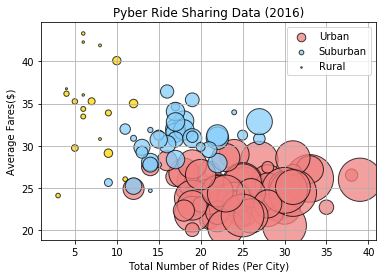

<Figure size 432x288 with 0 Axes>

In [83]:
 # Obtain the x and y coordinates for each of the three city types
data_grouped = combined_data_df.groupby(["city","type"]).count()
data_grouped = data_grouped.reset_index()
data_grouped = data_grouped.set_index("city")

data_mean = combined_data_df.groupby(["city","type"]).mean()
data_mean = data_mean.reset_index()
data_mean = data_mean.set_index("city")

data_sort = combined_data_df.groupby(["city","type"]).sum()
data_sort = data_sort.reset_index()
data_sort = data_sort.set_index("city")

rural_x = data_grouped.loc[data_grouped["type"] == "Rural"]["ride_id"]
urban_x = data_grouped.loc[data_grouped["type"] == "Urban"]["ride_id"]
sub_x = data_grouped.loc[data_grouped["type"] == "Suburban"]["ride_id"]

rural_y = data_mean.loc[data_mean["type"] == "Rural"]["fare"]
urban_y = data_mean.loc[data_mean["type"] == "Urban"]["fare"]
sub_y = data_mean.loc[data_mean["type"] == "Suburban"]["fare"]

sRural = data_sort.loc[data_sort["type"] == "Rural"]["driver_count"]
sUrban = data_sort.loc[data_sort["type"] == "Urban"]["driver_count"]
sSub = data_sort.loc[data_sort["type"] == "Suburban"]["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, marker = "o", facecolors="lightcoral", edgecolors = "black", alpha = .75, s = sUrban)
plt.scatter(sub_x, sub_y, marker = "o", facecolors="lightskyblue", edgecolors = "black", alpha = .75, s = sSub)
plt.scatter(rural_x, rural_y, marker = "o", facecolors="gold", edgecolors = "black", alpha = .75, s = sRural)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares($)")
plt.legend(["Urban", "Suburban", "Rural"], markerscale = .25, fancybox = True , loc="best")
plt.grid() 
plt.show()


#Save figure
plt.savefig("Resources/bubblePlotPyber.png")

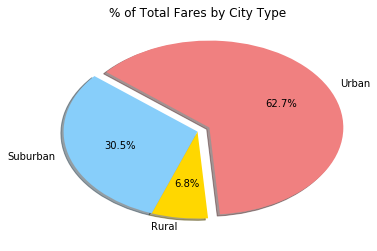

In [77]:
# Calculate Type Percents
cd_df_fare = combined_data_df.groupby(["type"]).sum()
fareTotal = cd_df_fare["fare"][0] + cd_df_fare["fare"][1] + cd_df_fare["fare"][2]
fareRural = round((cd_df_fare["fare"][0] / fareTotal) * 100, 2)
fareSub = round((cd_df_fare["fare"][1] / fareTotal) * 100, 2)
fareUrban = round((cd_df_fare["fare"][2] / fareTotal) * 100, 2)

# Build Pie Chart

types = ["Rural", "Urban", "Suburban"]
members = [fareRural, fareUrban, fareSub]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, .1, 0)
plt.pie(members, explode = explode, labels = types, colors = colors, autopct="%1.1f%%"
        ,shadow=True, startangle=250 )
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Resources/FaresByType.png")

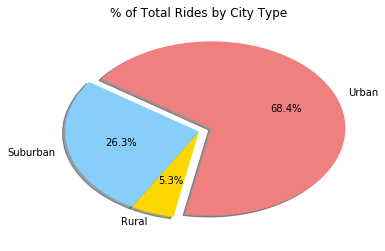

In [80]:
 # Calculate Ride Percents
cd_df_type = combined_data_df.groupby(["type"])
r_count = cd_df_type["driver_count"].count()
rural = round(r_count["Rural"] / r_count.sum() * 100,2)
urban = round(r_count["Urban"] / r_count.sum() * 100,2)
suburban = round(r_count["Suburban"] / r_count.sum() * 100,2)

# Build Pie Chart
types = ["Rural", "Urban", "Suburban"]
members = [rural, urban, suburban]
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, .1, 0)
plt.pie(members, explode = explode, labels = types, colors = colors, autopct="%1.1f%%"
        ,shadow=True, startangle=240 )
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Resources/RidesByType.png")

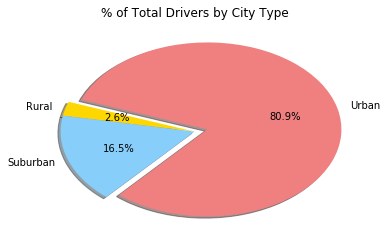

In [82]:
# Calculate Driver Percents - drop duplicates to get actual sums from each town
cd_df_driver =combined_data_df.drop_duplicates(["city"])
d_count = cd_df_driver.groupby(["type"]).sum()
explode = (0, 0, 0.1)
types = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
members = d_count["driver_count"]/d_count["driver_count"].sum()
# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(members, explode=explode, labels=types, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.savefig("Resources/DriversByType.png")